In [122]:
# Check / Install Dependencies
!conda install pandas numpy seaborn urllib3

Solving environment: done

# All requested packages already installed.



In [135]:
import pandas as pd
import numpy as np
import seaborn as sns

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
cwd = os.getcwd()

IMAGES_PATH = cwd

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Data

In [124]:
df = pd.read_csv("https://firebasestorage.googleapis.com/v0/b/thundernation-04.appspot.com/o/residential_energy_consumption_1998_2017.csv?alt=media&token=98c7bb5b-6206-47a4-9ee5-34ef47ce0dfa")

In [125]:
df.head()

,year,us_total,hydro,wind,wood,other_biomass,geothermal,solar,total,renewable_us_total_p
0,1998,"3,620.30",323.3,3.0,36.3,22.4,14.8,0.502,400.4,11.06 %
1,1999,"3,694.80",319.5,4.5,37.0,22.6,14.8,0.495,399.0,10.80 %
2,2000,"3,802.10",275.6,5.6,37.6,23.1,14.1,0.493,356.5,9.38 %
3,2001,"3,736.60",217.0,6.7,35.2,14.5,13.7,0.543,287.7,7.70 %
4,2002,"3,858.50",264.3,10.4,38.7,15.0,14.5,0.555,343.4,8.90 %


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
year                    20 non-null int64
us_total                20 non-null object
hydro                   20 non-null float64
wind                    20 non-null float64
wood                    20 non-null float64
other_biomass           20 non-null float64
geothermal              20 non-null float64
solar                   20 non-null float64
total                   20 non-null float64
renewable_us_total_p    20 non-null object
dtypes: float64(7), int64(1), object(2)
memory usage: 1.6+ KB


In [127]:
df1 = df

df['us_total'] = df['us_total'].str.replace(',', '').astype(float)

In [142]:
df

,year,us_total,hydro,wind,wood,other_biomass,geothermal,solar,total,renewable_us_total_p
0,1998,3620.30,323.30,3.00,36.30,22.40,14.80,0.502,400.40,11.06 %
1,1999,3694.80,319.50,4.50,37.00,22.60,14.80,0.495,399.00,10.80 %
2,2000,3802.10,275.60,5.60,37.60,23.10,14.10,0.493,356.50,9.38 %
3,2001,3736.60,217.00,6.70,35.20,14.50,13.70,0.543,287.70,7.70 %
4,2002,3858.50,264.30,10.40,38.70,15.00,14.50,0.555,343.40,8.90 %
5,2003,3883.20,275.80,11.20,37.50,15.80,14.40,0.534,355.30,9.15 %
6,2004,3970.60,268.40,14.10,38.10,15.40,14.80,0.575,351.50,8.85 %
7,2005,4055.40,270.30,17.80,38.90,15.40,14.70,0.550,357.70,8.82 %
8,2006,4064.70,289.20,26.60,38.80,16.10,14.60,0.508,385.80,9.49 %
9,2007,4156.70,247.50,34.50,39.00,16.50,14.60,0.612,352.70,8.49 %


In [149]:
df1 = df[["year", "renewable_us_total_p"]]

str(df1.to_json()).replace("\\u00a0","")

'{"year":{"0":1998,"1":1999,"2":2000,"3":2001,"4":2002,"5":2003,"6":2004,"7":2005,"8":2006,"9":2007,"10":2008,"11":2009,"12":2010,"13":2011,"14":2012,"15":2013,"16":2014,"17":2015,"18":2016,"19":2017},"renewable_us_total_p":{"0":"11.06%","1":"10.80%","2":"9.38%","3":"7.70%","4":"8.90%","5":"9.15%","6":"8.85%","7":"8.82%","8":"9.49%","9":"8.49%","10":"9.25%","11":"10.57%","12":"10.36%","13":"12.52%","14":"12.22%","15":"12.69%","16":"13.19%","17":"13.35%","18":"14.94%","19":"17.12%"}}'

In [171]:
df1['year'].values.tolist()

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
year                    20 non-null int64
us_total                20 non-null float64
hydro                   20 non-null float64
wind                    20 non-null float64
wood                    20 non-null float64
other_biomass           20 non-null float64
geothermal              20 non-null float64
solar                   20 non-null float64
total                   20 non-null float64
renewable_us_total_p    20 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 1.6+ KB


Saving figure scatter_matrix_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/end_to_end_project/scatter_matrix_plot.png'

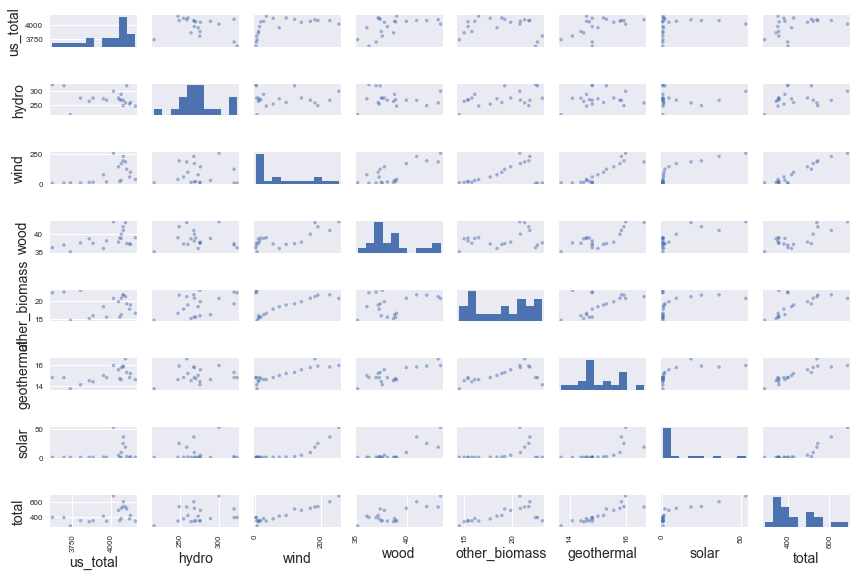

In [138]:
from pandas.plotting import scatter_matrix

attributes = ["us_total", "hydro", "wind", "wood", "other_biomass", "geothermal", "solar", "total", "renewable_us_total_p"]
scatter_matrix(df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [ ]:
d

In [140]:
from sklearn import linear_model as lm

model = lm.LinearRegression()
